# Linear Regression

### 1. Reading Data

In [10]:
# Import pandas to manipulate the data
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib for visual analysis
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from csv file
df = pd.read_csv('processed_df.csv', index_col=0, parse_dates=True, dayfirst=True)

# Review the first 5 rows of the dataframe
df.head()

,time,weight,bmi,body_fat,fat_free_body_weight,sub_fat,vis_fat,body_water,ske_muscle,muscle_mass,bone_mass,protein,bmr,age,month,year
DATE,,,,,,,,,,,,,,,,
2023-11-01,07:03,167.4,24.8,0.241,127.1,0.162,9.5,0.520,0.522,119.0,6.5,0.199,1619,38,Nov,2023
2023-11-02,07:03,166.2,24.6,0.238,126.6,0.160,9.4,0.522,0.524,118.6,6.6,0.200,1614,38,Nov,2023
2023-11-09,07:04,166.4,24.6,0.239,126.6,0.161,9.4,0.521,0.523,118.6,6.6,0.200,1615,38,Nov,2023
2023-11-16,07:04,166.6,24.7,0.240,126.6,0.161,9.5,0.521,0.522,118.6,6.5,0.200,1616,38,Nov,2023
2023-11-23,07:03,165.8,24.6,0.238,126.3,0.160,9.4,0.522,0.524,118.5,6.6,0.201,1611,38,Nov,2023


### Data Exploration

In [4]:
# Select features to explore
bdw = df[['weight', 'bmi', 'body_fat', 'muscle_mass']]
bdw.head(7)

,weight,bmi,body_fat,muscle_mass
DATE,,,,
2023-11-01,167.4,24.8,0.241,119.0
2023-11-02,166.2,24.6,0.238,118.6
2023-11-09,166.4,24.6,0.239,118.6
2023-11-16,166.6,24.7,0.240,118.6
2023-11-23,165.8,24.6,0.238,118.5
2023-11-30,164.4,24.4,0.234,118.0
2023-12-01,165.0,24.4,0.236,118.3


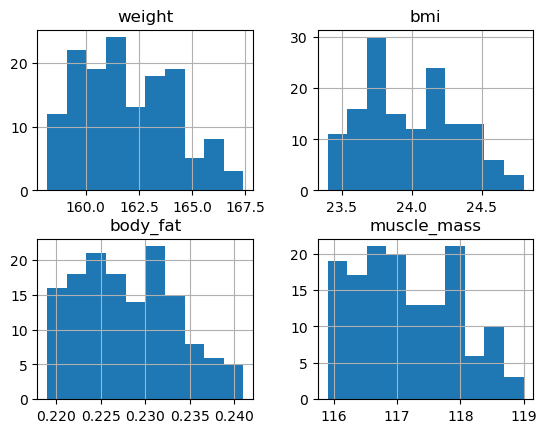

In [5]:
# Plot each feature
viz = df[['weight', 'bmi', 'body_fat', 'muscle_mass']]
viz.hist()
plt.show()

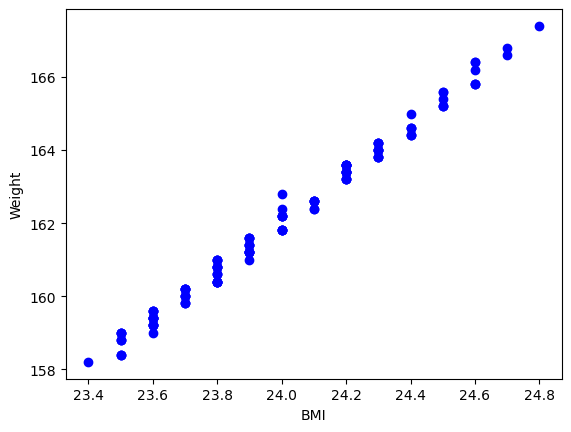

In [6]:
# Plot each feature against Weight to see how linear the relationship is
plt.scatter(bdw.bmi, bdw.weight, color='blue')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()

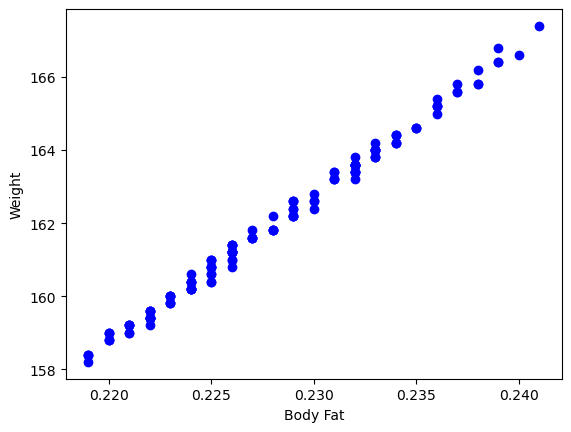

In [7]:
plt.scatter(bdw.body_fat, bdw.weight, color='blue')
plt.xlabel('Body Fat')
plt.ylabel('Weight')
plt.show()

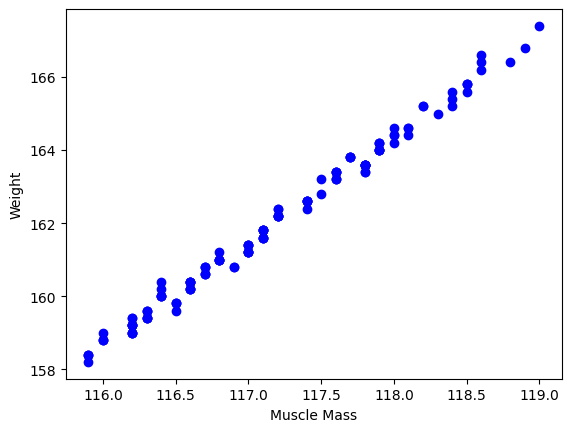

In [8]:
plt.scatter(bdw.muscle_mass, bdw.weight, color='blue')
plt.xlabel('Muscle Mass')
plt.ylabel('Weight')
plt.show()

### Creating train and test dataset

In [11]:
# Create train and test data
# With 80% of rows being used to train the model and the remaining 20% being used to test
msk = np.random.rand(len(df)) < 0.8
train = bdw[msk]
test = bdw[~msk]

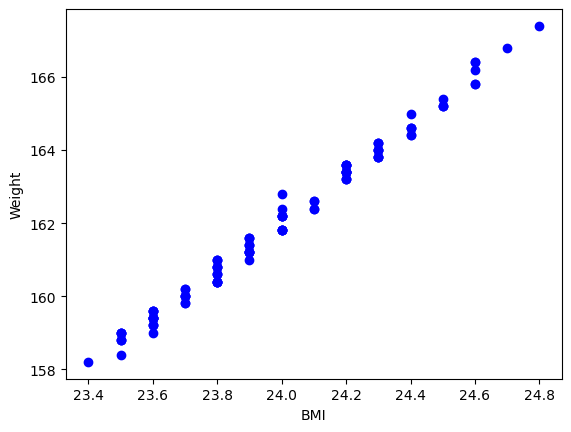

In [17]:
# Train data distribution
plt.scatter(train.bmi, train.weight, color='blue')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()

In [16]:
# Model the data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bmi']])
train_y = np.asanyarray(train[['weight']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[6.60453956]]
Intercept:  [3.52593287]


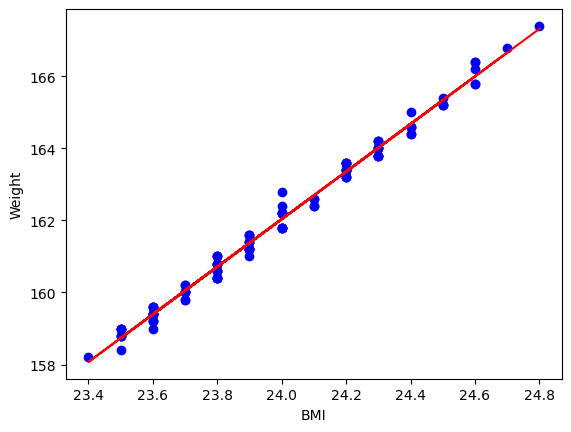

In [19]:
# Plot outputs
plt.scatter(train.bmi, train.weight, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()

In [21]:
# Calculate accuracy of model

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['bmi']])
test_y = np.asanyarray(test[['weight']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 0.19
Residual sum of squares (MSE): 0.04
R2-score: 0.99
